<a href="https://colab.research.google.com/github/ykro/ML-SP1-2021/blob/main/Lesson-02/L2N4_Callback%26training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

#dark theme
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
(full_train_images, full_train_labels), (full_test_images, full_test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
full_train_images.shape, full_train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
full_test_images.shape

(10000, 32, 32, 3)

In [5]:
full_class_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

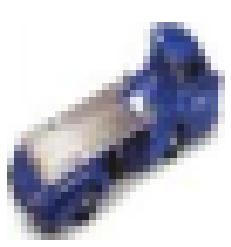

In [6]:
index = np.random.randint(full_train_images.shape[0])

plt.imshow(full_train_images[index])
plt.title(full_class_names[full_train_labels[index][0]])
plt.axis('off')
plt.show()

In [7]:
class_names = ['plane', 'bird']

In [8]:
def strip_dataset(full_images, full_labels):
  label_map = {0: 0, 2: 1}
  indeces = np.where((full_labels == 0) | 
                     (full_labels == 2))[0]

  images = full_images[indeces]
  labels = np.expand_dims(np.fromiter(
                            map(lambda x:label_map[x[0]], 
                                       full_labels[indeces]),
                            dtype=np.int
                            ), 
                          axis=1)
  
  return (images, labels)

In [9]:
train_images, train_labels = strip_dataset(full_train_images, full_train_labels)
test_images, test_labels = strip_dataset(full_test_images, full_test_labels)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


(10000, 32, 32, 3) (10000, 1)
(2000, 32, 32, 3) (2000, 1)


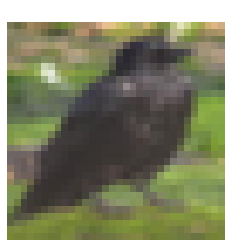

In [10]:
index = np.random.randint(train_images.shape[0])

plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])
plt.axis('off')
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape, test_images.shape

((10000, 32, 32, 3), (2000, 32, 32, 3))

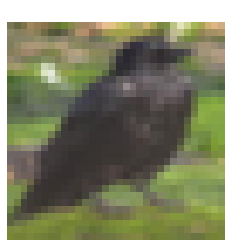

In [12]:
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])
plt.axis('off')
plt.show()

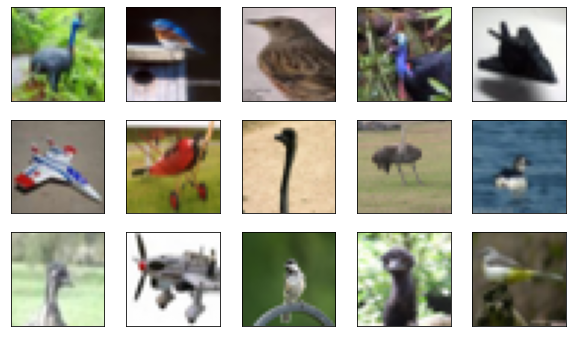

In [13]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]], color='w')
plt.show()

In [14]:
model = Sequential([
  Flatten(input_shape=(32,32,3)),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,573,889
Trainable params: 1,573,889
Non-trainable params: 0
_________________________________________________________________


In [15]:
class StopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc = logs['accuracy']
    if (acc >= 0.9):
      print(f'\n\nReached 90% accuracy, stopping on epoch #{epoch}')
      self.model.stop_training = True

In [17]:
epochs = 50
history = model.fit(train_images, 
                    train_labels,
                    epochs = epochs,
                    validation_split=0.2,
                    callbacks=[StopCallback()])

Epoch 1/50
250/250 [==============================] - 3s 9ms/step - loss: 0.6347 - accuracy: 0.6716 - val_loss: 0.4988 - val_accuracy: 0.7845
Epoch 2/50
250/250 [==============================] - 2s 8ms/step - loss: 0.5176 - accuracy: 0.7680 - val_loss: 0.4935 - val_accuracy: 0.7875
Epoch 3/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4907 - accuracy: 0.7804 - val_loss: 0.4821 - val_accuracy: 0.7910
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4778 - accuracy: 0.7889 - val_loss: 0.4737 - val_accuracy: 0.7970
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4825 - accuracy: 0.7766 - val_loss: 0.5006 - val_accuracy: 0.7720
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4796 - accuracy: 0.7925 - val_loss: 0.4573 - val_accuracy: 0.8065
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 0.4537 - accuracy: 0.8027 - val_loss: 0.4547 - val_accuracy: 0.8090
Epoch 

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


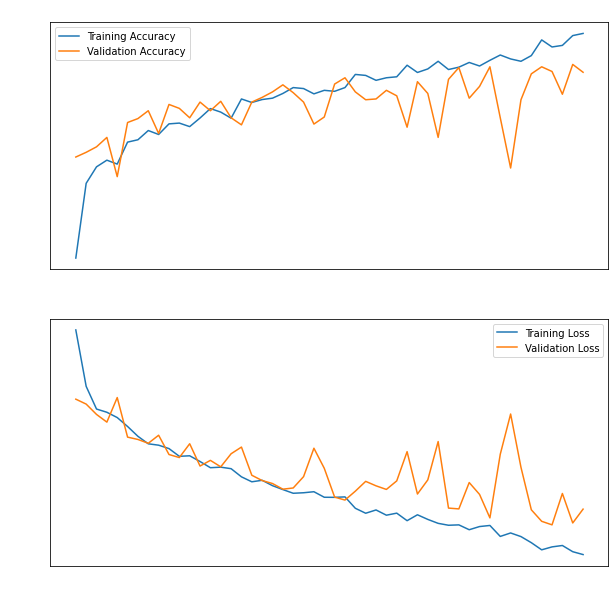

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()